/Users/srashtibajpai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


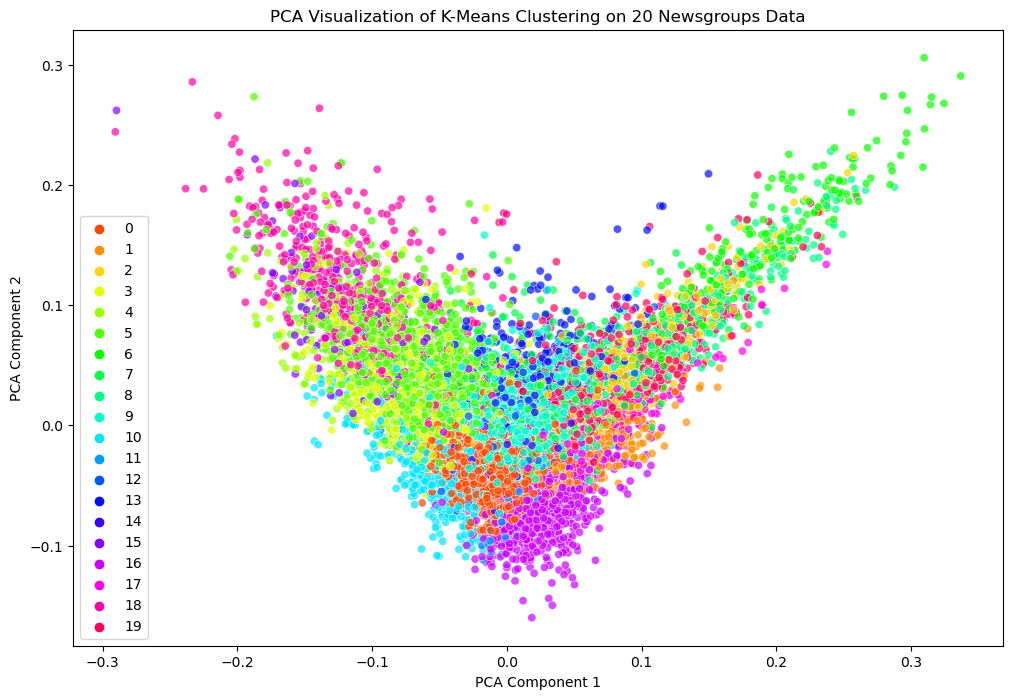

In [1]:
import tarfile
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = newsgroups.data
labels = newsgroups.target

# Step 2: Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Step 3: Apply K-Means Clustering
num_clusters = 20  # Assume we want 20 clusters, one for each newsgroup
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Step 4: Evaluate the Clusters
# Here, we can analyze cluster centers, inertia, or silhouette scores if needed.
cluster_labels = kmeans.labels_

# Step 5: Visualize the Clusters using PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_data[:, 0], y=reduced_data[:, 1],
    hue=cluster_labels,
    palette=sns.color_palette("hsv", num_clusters),
    legend="full",
    alpha=0.7
)
plt.title('PCA Visualization of K-Means Clustering on 20 Newsgroups Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
